# Research of advertisements for the sale of apartments
The data is an archive of ads for several years for the sale of apartments in St. Petersburg and neighboring settlements. Each object contains two types of data. The first data type is cartographic and the second data type is user-added. \
It is necessary to perform data preprocessing. Explore the data and discover interesting relationships between them.

## Let's open the data file and study the general information

In [1]:
!pip install missingno -U

**Importing the required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

**Download dataset**

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

**Get general information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Let's rename some columns**

In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})



In [6]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [125]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,day_of_post,month_of_post,year_of_post,type_floor,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN


**Let's build a general histogram**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

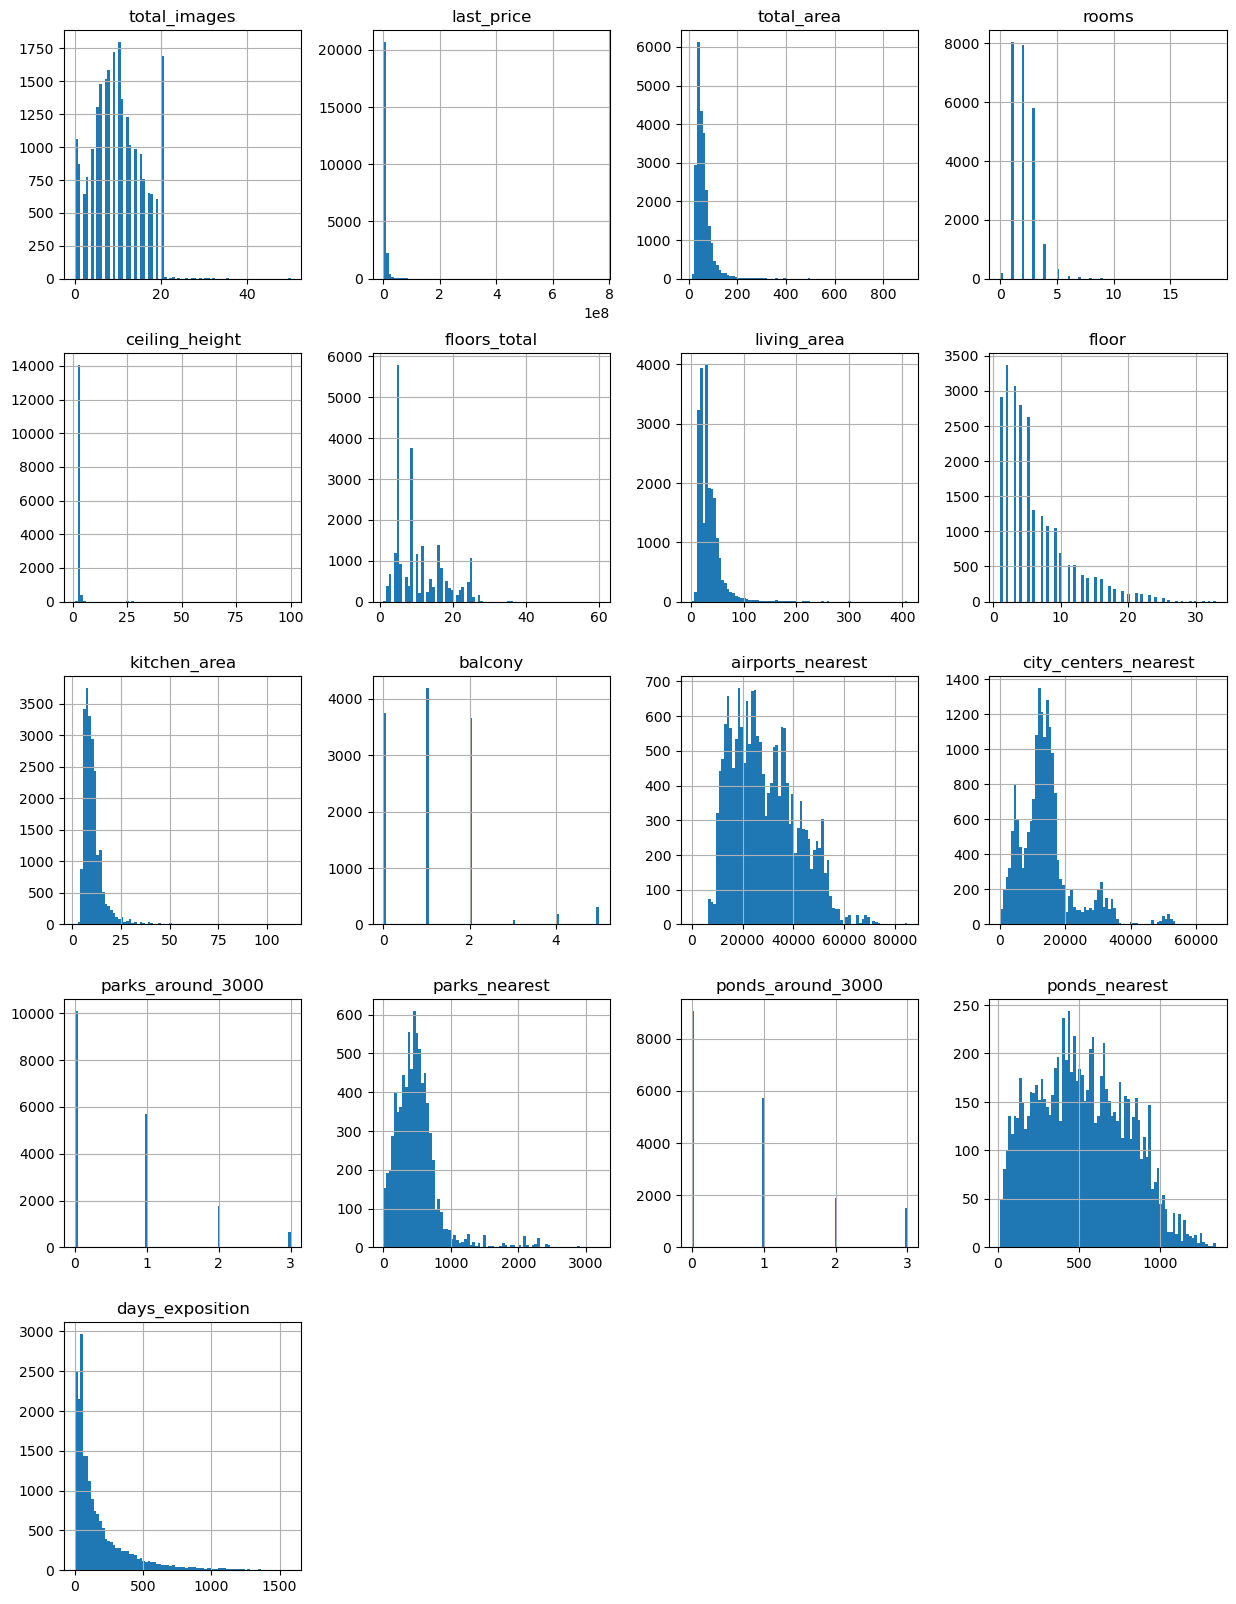

In [7]:
data.hist(figsize=(15, 20), bins=80)

## Let's make data preprocessing

### Examining the dataset for duplicates

In [8]:
data.duplicated().sum()

0

The dataset has no full duplicates

### Examining the dataset for missing values

<AxesSubplot:>

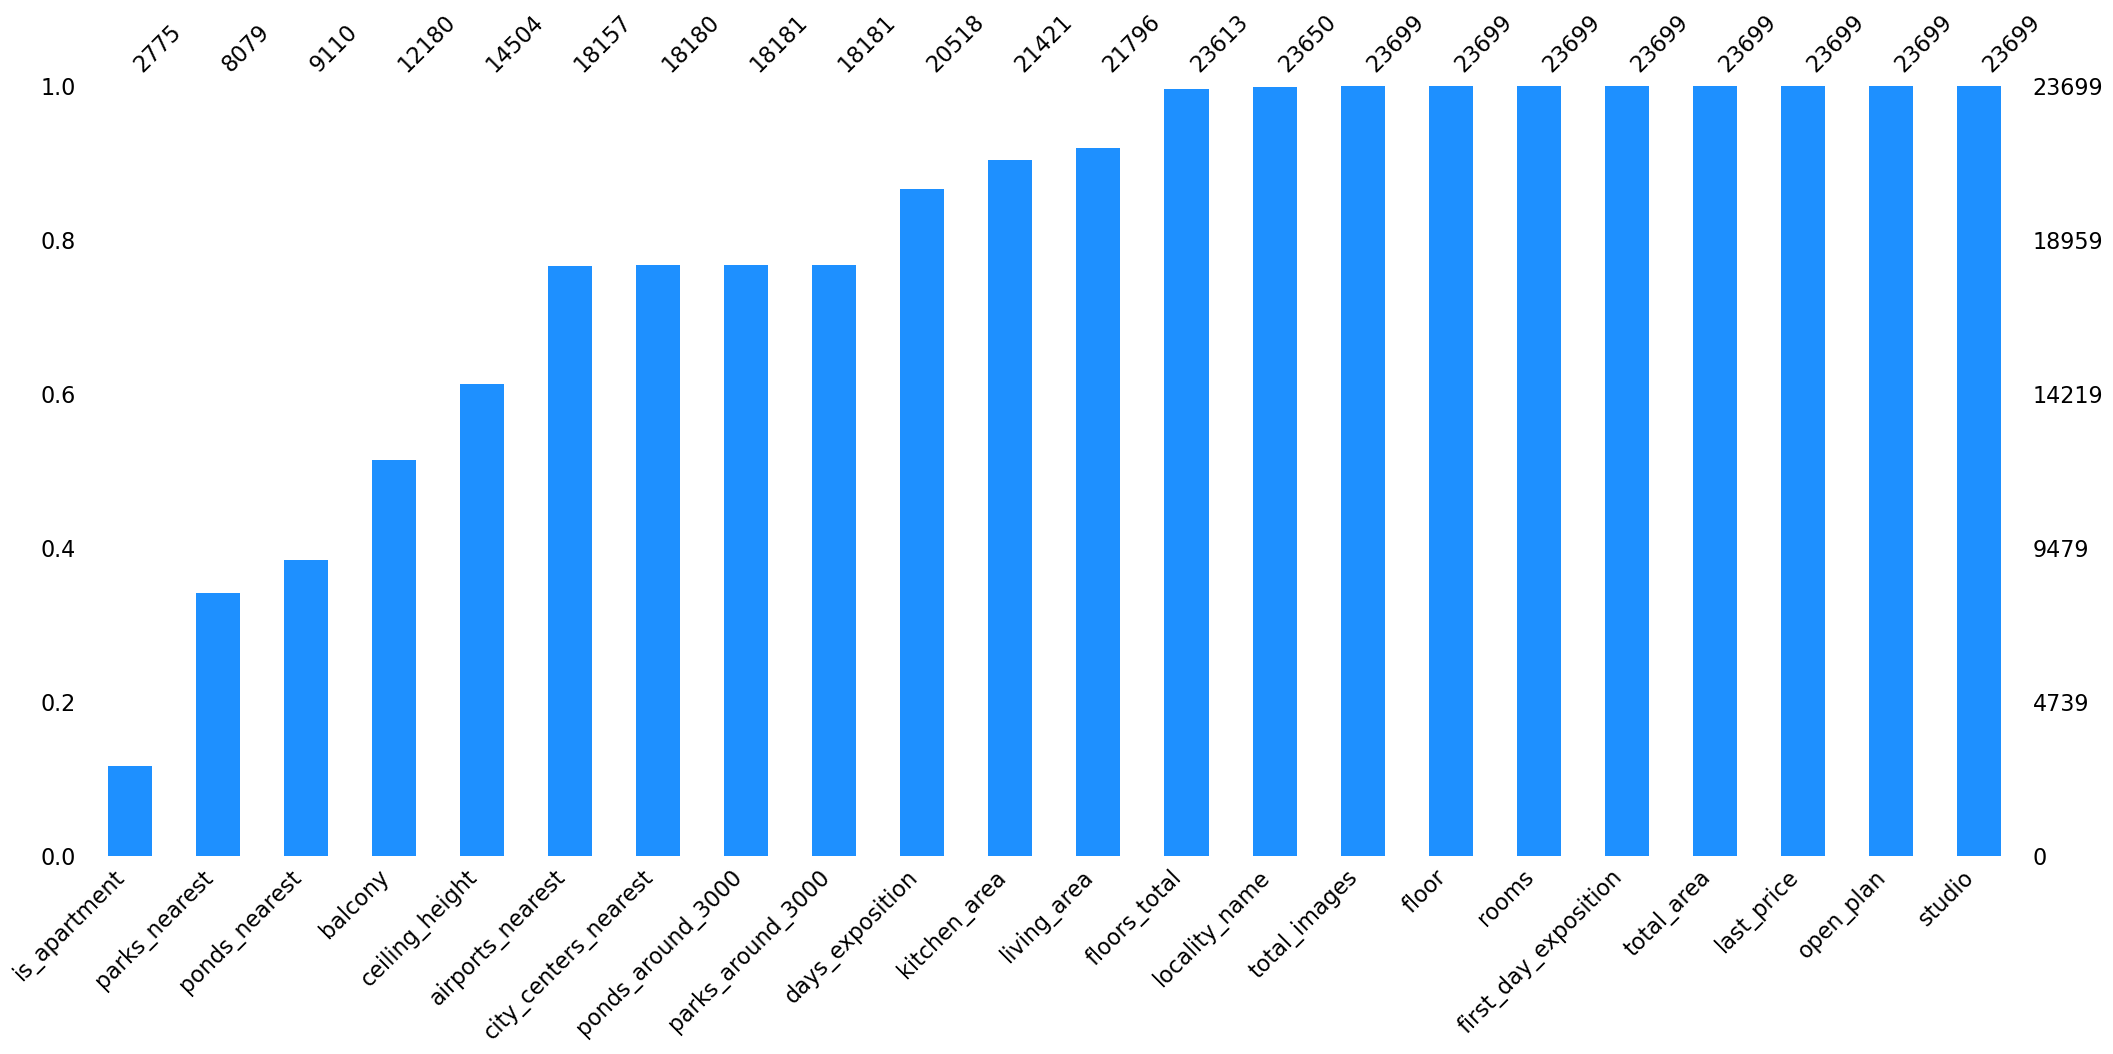

In [9]:
missingno.bar(data, color="dodgerblue", sort="ascending")

<AxesSubplot:>

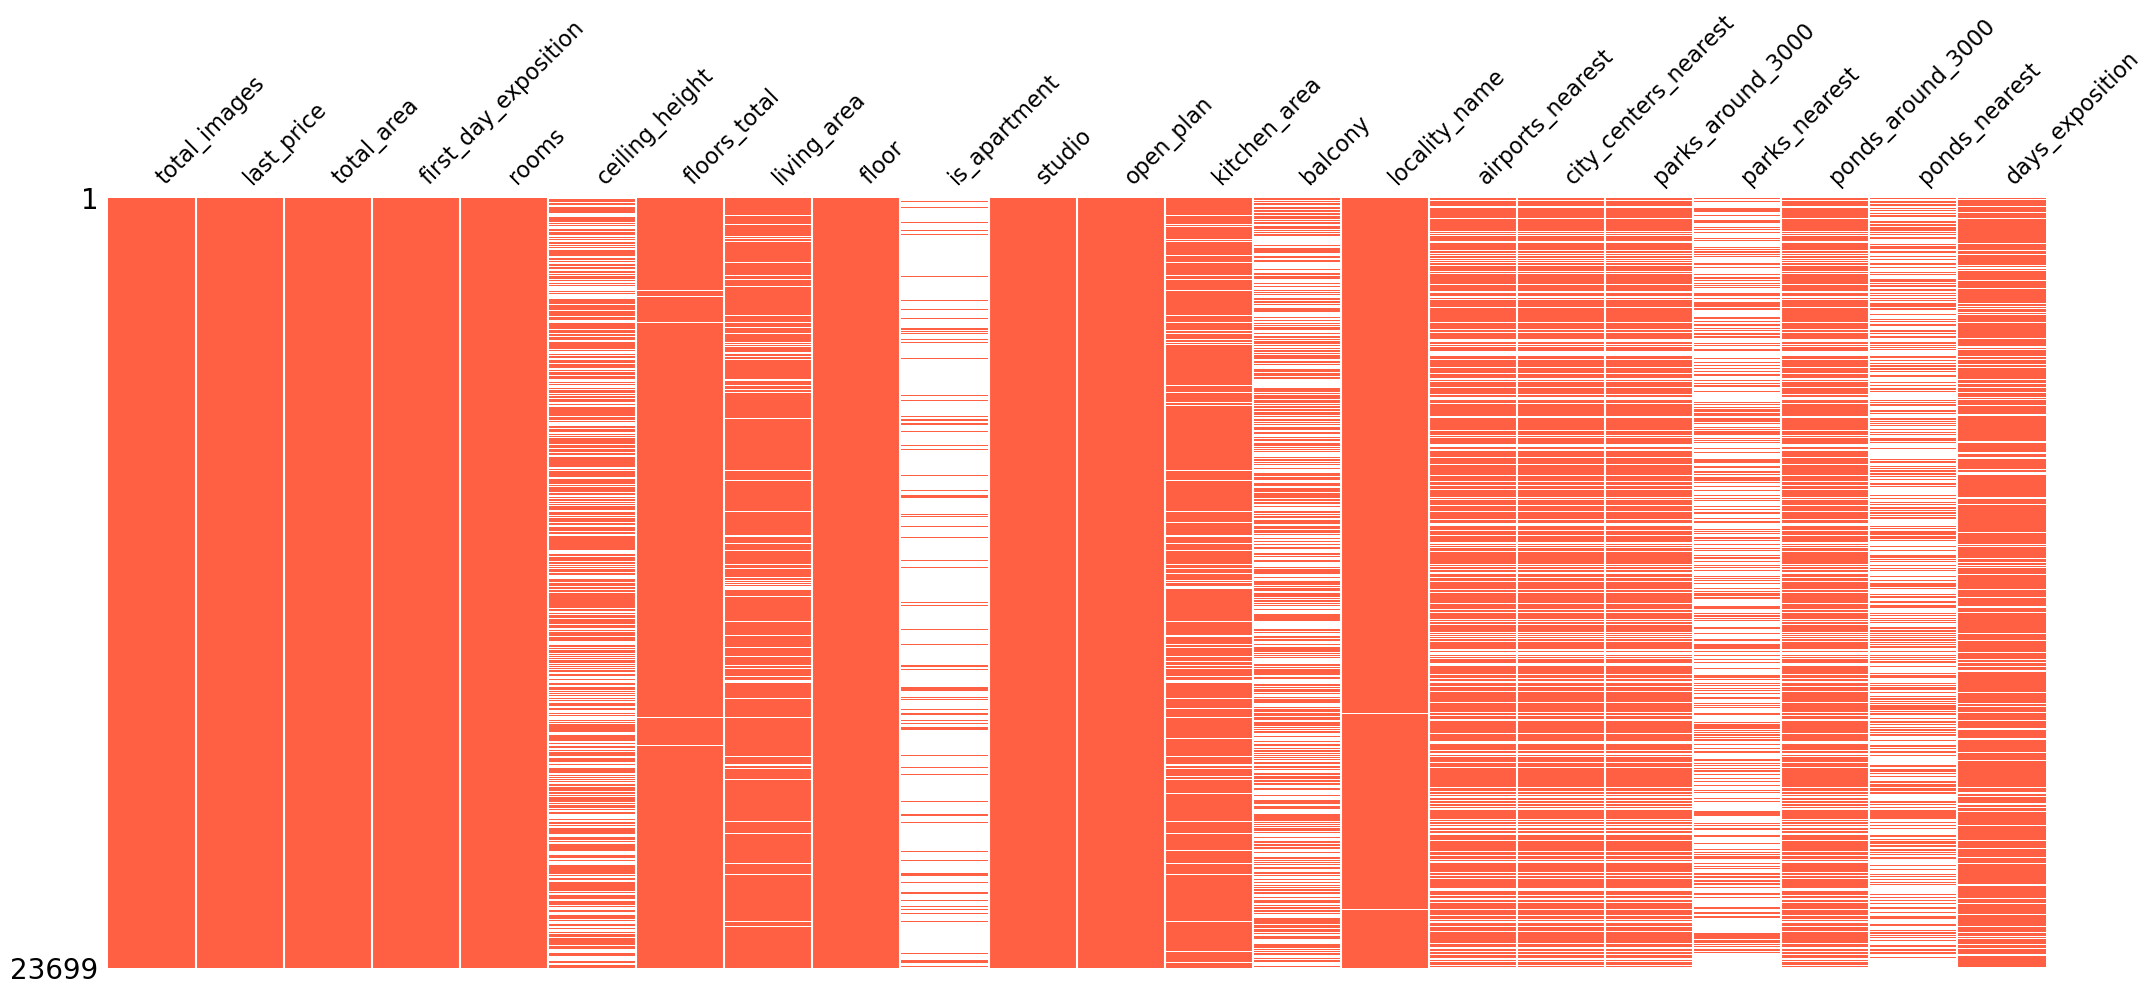

In [10]:
missingno.matrix(data, sparkline=False, color=(1, 0.38, 0.27))

<AxesSubplot:>

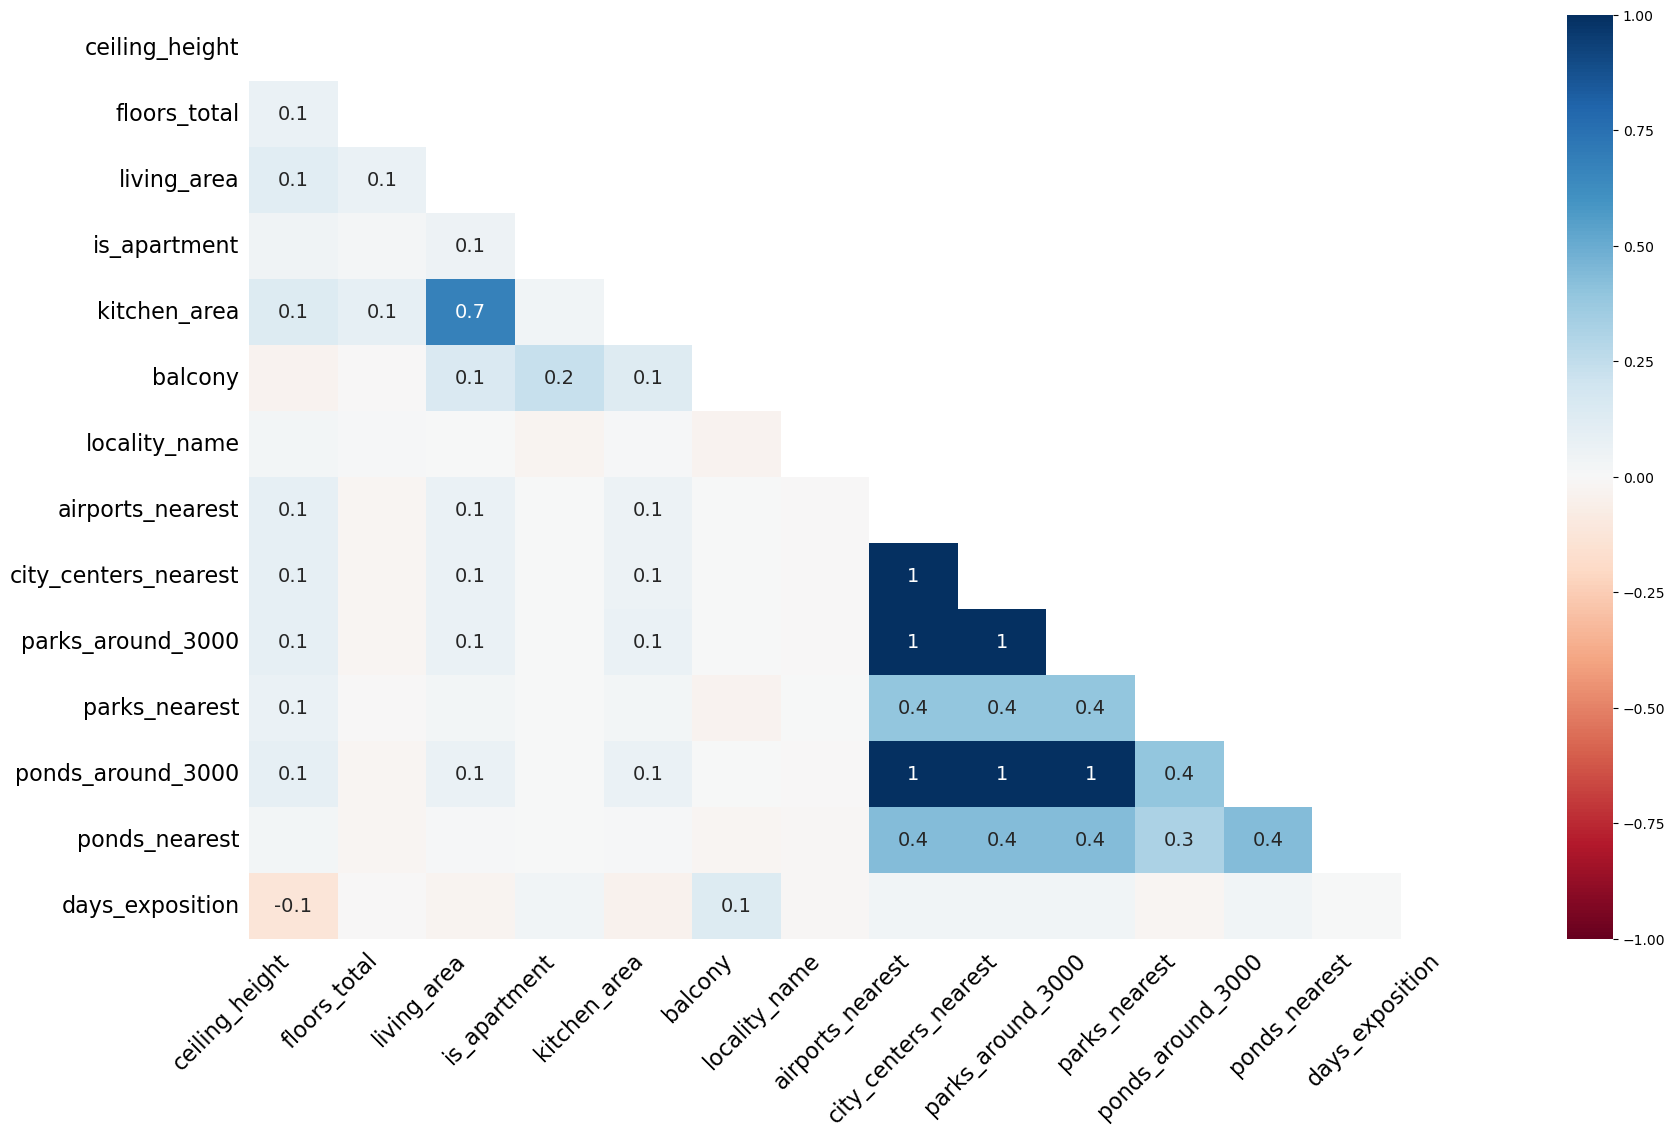

In [11]:
missingno.heatmap(data)

The missing data can be divided into dependent and independent. Also cartographic and user-added. \
**Map data:** airports_nearest, city_center_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition (7) \
**User data:** ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name (7)

Each feature that is map data depends on other similar data. Therefore, in this data, we do not fill in the missing values and do not delete them. \
User data have not same dependencies. We have relationship between kitchen_area and living_area. 

**kitchen_area \
living_area** \
Reason for missing values: Some users do not know the parameters of this feature

Fill in the missing values with the median grouped by the number of rooms

In [12]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[(data['rooms'] == i), 'kitchen_area'].median()
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == i), 'living_area'].median()
    

Delete the rest of the data

In [13]:
data = data[~data['kitchen_area'].isna()]
data = data[~data['living_area'].isna()]

Check out

In [14]:
data['kitchen_area'].isna().sum()

0

In [15]:
data['living_area'].isna().sum()

0

**ceiling_height** \
Reason for missing values: Some users do not know the parameters of this feature

We do not delete the missing values

**floors_total** \
Reason for missing values: Some users do not know the parameters of this feature or data upload error

There are a few missing values, so we put the median

In [16]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

**is_apartment** \
Reason for missing values: data upload error

There are a lot of missing values, most likely it means False. Put missing values and change types.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')

**balcony** \
Reason for missing values: Most likely, users did not fill in this attribute due to its absence. 

There are a lot of missing values. Replace all missing values with 0. 

In [18]:
data['balcony'] = data['balcony'].fillna(0)

**locality_name** \
Reason for missing values: Some users do not know the parameters of this feature

Delete this missing values, because we cannot fill correct values

In [19]:
data = data.dropna(subset=['locality_name'])

Also this feature has implicit duplicates. 

In [20]:
ln_list = list(data['locality_name'].unique())
ln_list.sort()
print(*ln_list, sep='\n')
ln_list = pd.Series(ln_list)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

Let's replace the values with the correct ones

In [21]:
list_village = ['городской поселок', 'городской посёлок', 'поселок', 'поселок городского типа', 'посёлок городского типа', 'посёлок при железнодорожной станции', 'коттеджный поселок', 'коттеджный посёлок', 'поселок станции', 'посёлок станции']
loc_name = data['locality_name']

for item in list_village:
    loc_name = loc_name.str.replace(item, 'посёлок')
loc_name = loc_name.str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

We will not delete the data generated by the online service: 
1. airports_nearest
2. city_center_nearest 
3. parks_around_3000 
4. parks_nearest 
5. ponds_around_3000 
6. ponds_nearest
7. days_exposition

Replace data types some features

In [22]:
for i in data.columns:
    if data[i].dtype == 'float64':
        count = data[data[i] % 1 != 0][i].count()
        if count == 0:
            data[i] = data[~data[i].isna()][i].astype('int32')

Replace data type in first_day_exposition

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


### Examining the dataset for abnormal values

Let's check each feature for outliners. If there are outliners, then remove them

In [23]:
def right_whisker(data, column):
    quant1 = data[column].quantile(0.25)
    quant3 = data[column].quantile(0.75)
    IQR = quant3 - quant1
    right_whisker = quant3 + 1.5 * IQR
    return right_whisker

In [24]:
def left_whisker(data, column):
    quant1 = data[column].quantile(0.25)
    quant3 = data[column].quantile(0.75)
    IQR = quant3 - quant1
    left_whisker = quant1 - 1.5 * IQR
    return left_whisker

In [25]:
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64' or data[column].dtype == 'int32':
        outliner = len(data[data[column] > right_whisker(data, column)]) / len(data) * 100
        if outliner >= 8:
            data = data[data[column] < 3 * np.std(data[column])]
            #data = data.reset_index()


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23167 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23167 non-null  int64  
 1   last_price            23167 non-null  int32  
 2   total_area            23167 non-null  float64
 3   first_day_exposition  23167 non-null  object 
 4   rooms                 23167 non-null  int64  
 5   ceiling_height        14223 non-null  float64
 6   floors_total          23167 non-null  int32  
 7   living_area           23167 non-null  float64
 8   floor                 23167 non-null  int64  
 9   is_apartment          23167 non-null  bool   
 10  studio                23167 non-null  bool   
 11  open_plan             23167 non-null  bool   
 12  kitchen_area          23167 non-null  float64
 13  balcony               23167 non-null  int32  
 14  locality_name         23167 non-null  object 
 15  airports_nearest   

We deleted no more than 1 percent of the data

Now we will display the complete statistical information about the features

In [27]:
for i in data.columns:
    if i != 'index' and (data[i].dtype == 'float64' or data[i].dtype == 'int64' or data[i].dtype == 'int32'):
        print(i)
        print(data[i].describe())
        print('======================================')

total_images
count    23167.000000
mean         9.841973
std          5.661593
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64
last_price
count    2.316700e+04
mean     5.796624e+06
std      4.146369e+06
min      1.219000e+04
25%      3.431750e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.255000e+07
Name: last_price, dtype: float64
total_area
count    23167.000000
mean        58.664193
std         28.623624
min         12.000000
25%         40.000000
50%         52.000000
75%         68.890000
max        460.800000
Name: total_area, dtype: float64
rooms
count    23167.000000
mean         2.060344
std          1.025229
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
ceiling_height
count    14223.000000
mean         2.761545
std          1.253241
min          1.000000
25%          2.500000
5

Abnormal values are present in the ceiling_height. We will delete them

In [28]:
rowsBig = (data['ceiling_height'] / 10 >= 1) & (data['ceiling_height'] / 10 <= 10)
data.loc[rowsBig, 'ceiling_height'] = data['ceiling_height'] / 10

## Let's add features to the data

### Price per square meter

In [30]:
data['price_square_meter'] = data['last_price'] / data['total_area']

### Day of the week

In [33]:
data['day_of_post'] = data['first_day_exposition'].dt.weekday

### Month

In [34]:
data['month_of_post'] = data['first_day_exposition'].dt.month

### Year

In [35]:
data['year_of_post'] = data['first_day_exposition'].dt.year

### Floor type

In [36]:
data['type_floor'] = data['floor']

data.loc[data['floor'] == 1, 'type_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'type_floor'] = 'последний'
data.loc[(data['floor'] != 1) & (data['floor'] != data['floors_total']), 'type_floor'] = 'другой'

### Distance to city center in km

In [37]:
data['city_center_km'] = round(data['city_centers_nearest'] / 1000, 0)

## Let's do an exploratory data analisys

In [58]:
def print_value_hist(data, name_column):
    dict_value = {}
    dict_value['median'] = data[name_column].median()
    dict_value['mean'] = data[name_column].mean()
    dict_value['right_whisker'] = right_whisker(data, name_column)
    if left_whisker(data, name_column) <= data[name_column].min():
        dict_value['left_whisker'] = data[name_column].min()
    else:
        dict_value['left_whisker'] = left_whisker(data, name_column)
    print(dict_value)
    
    data[name_column].plot(kind='hist', grid=True, bins=100, title=name_column)

In [65]:
def print_value_boxplot(name_column, max_value):
    plt.ylim(0, max_value)
    plt.title(name_column)
    data.boxplot(column=name_column)

### total_area

{'median': 52.0, 'mean': 58.66419346484203, 'right_whisker': 112.225, 'left_whisker': 12.0}


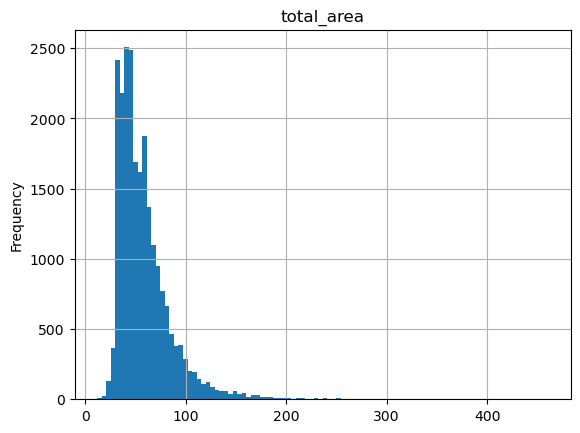

In [59]:
print_value_hist(data, 'total_area')

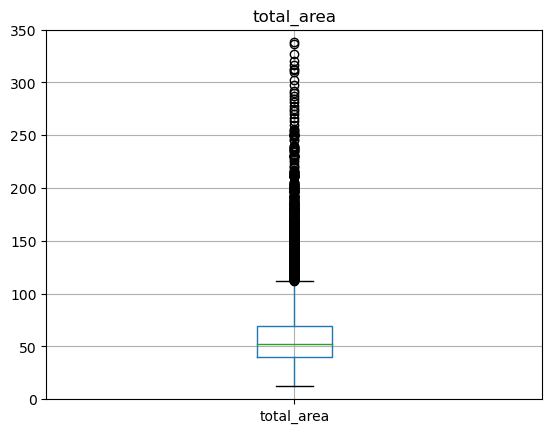

In [66]:
print_value_boxplot('total_area', 350)

**Conclusion:** The median is 52 square meters of total area. The largest number of apartments has approximately the same area. Emissions are explained by the small number of large apartments.

### living_area

{'median': 30.2, 'mean': 33.46259297759672, 'right_whisker': 77.9, 'left_whisker': 2.0}


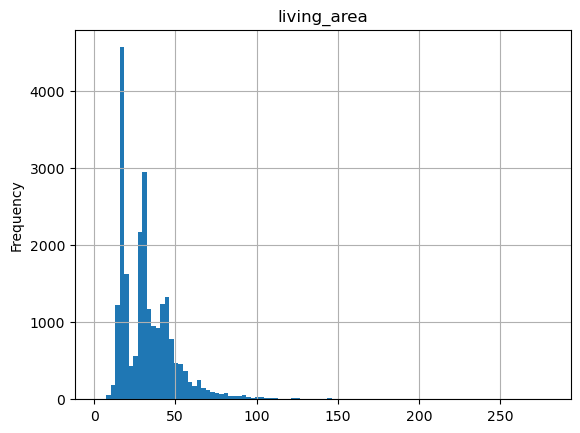

In [67]:
print_value_hist(data, 'living_area')

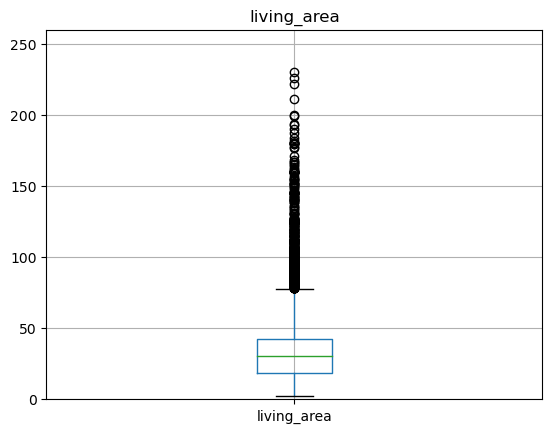

In [72]:
print_value_boxplot('living_area', 260)

**Conclusion:** The median is 30 square meters of living area. The reason for value outliners is the same as total_area.

### kitchen_area

{'median': 9.04, 'mean': 10.25262658091249, 'right_whisker': 17.700000000000003, 'left_whisker': 1.3}


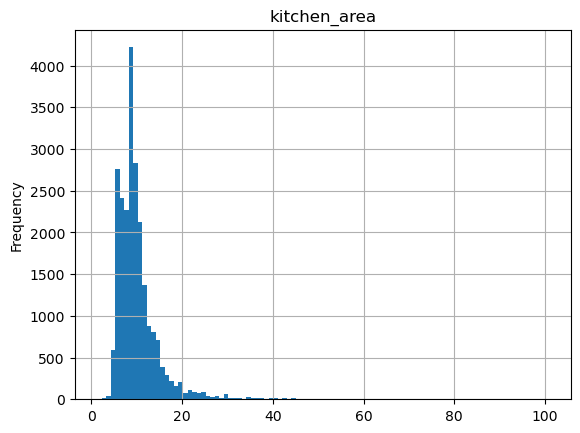

In [74]:
print_value_hist(data, 'kitchen_area')

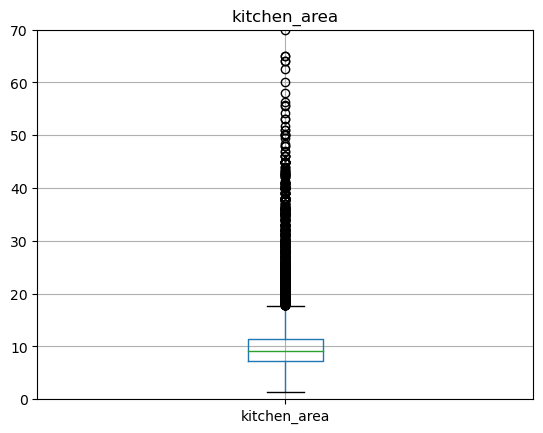

In [78]:
print_value_boxplot('kitchen_area', 70)

**Conclusion:** The median is 9 square meters of kitchen area. The reason for value outliners in the same as total_area and living_area, because these features are linearly dependent. 

### last_price

{'median': 4600000.0, 'mean': 5796624.4089437565, 'right_whisker': 11602375.0, 'left_whisker': 12190}


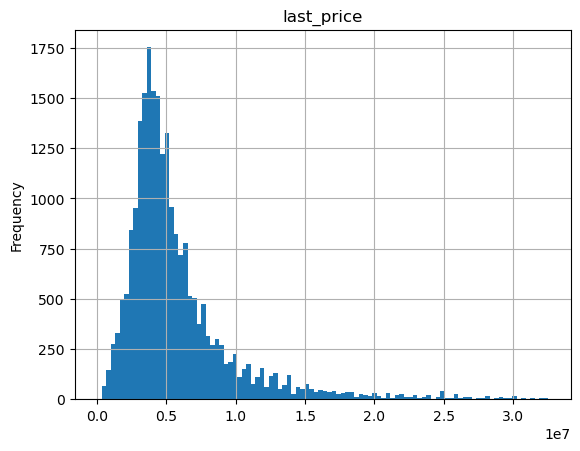

In [79]:
print_value_hist(data, 'last_price')

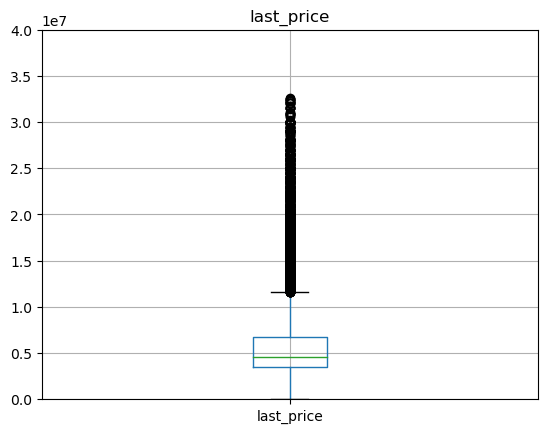

In [87]:
print_value_boxplot('last_price', 40000000)

**Conclusion:** The median is 4 600 000 conventional unit. The last price linearly depends on the total area, but the slove of the curve is less. Because other features affect the last price like city center nearest, airport nearest etc.

### Rooms

{'median': 2.0, 'mean': 2.0603444554754606, 'right_whisker': 6.0, 'left_whisker': 1}


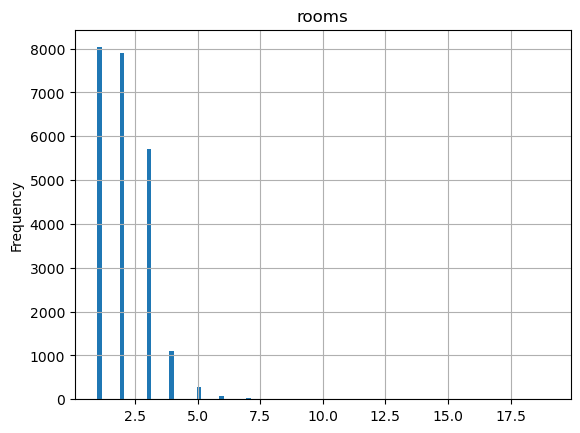

In [88]:
print_value_hist(data, 'rooms')

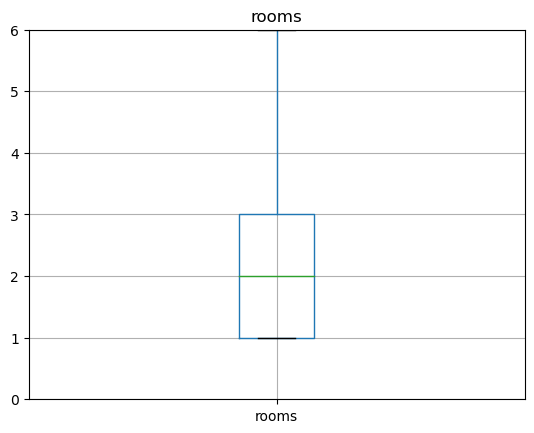

In [90]:
print_value_boxplot('rooms', 6)

**Conclusion:** The median is 2 rooms, because most apartments have small total area

### ceiling_height

{'median': 2.65, 'mean': 2.7189973985797136, 'right_whisker': 3.2499999999999996, 'left_whisker': 2.0500000000000003}


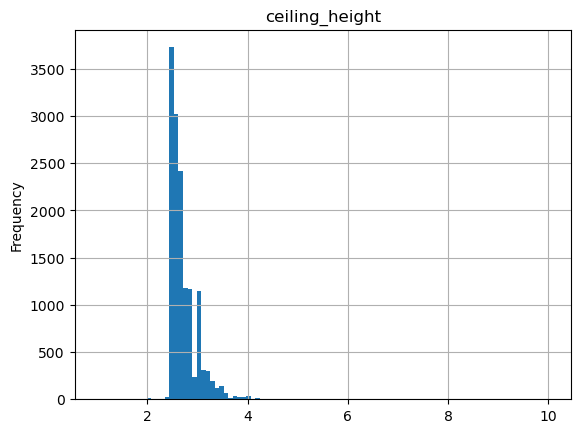

In [91]:
print_value_hist(data, 'ceiling_height')

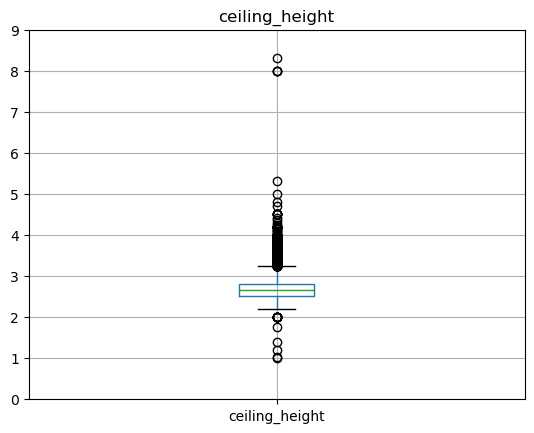

In [92]:
print_value_boxplot('ceiling_height', 9)

**Conclusion:** The median is 2.65 meter. Indeed, the standard ceiling height is just that. However, in old houses the ceilings are high.

### floor

{'median': 4.0, 'mean': 5.879354253895627, 'right_whisker': 17.0, 'left_whisker': 1}


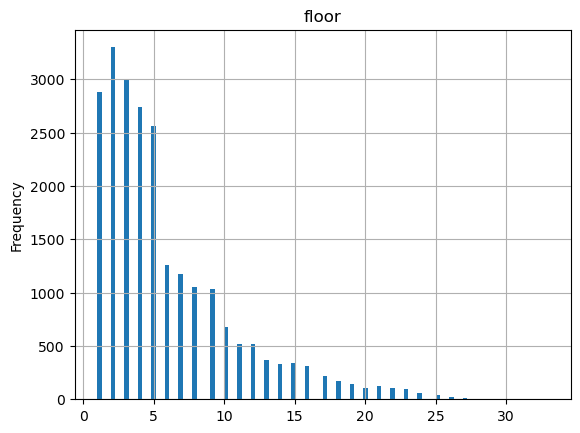

In [93]:
print_value_hist(data, 'floor')

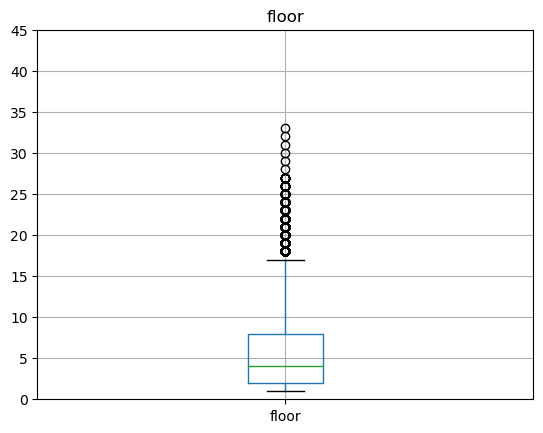

In [94]:
print_value_boxplot('floor', 45)

**Conclusion:** The largest number of apartments has second floor, but the median is fourth floor. As expected, the higher the floor, the fewer apartments. 

### type_floor

<AxesSubplot:>

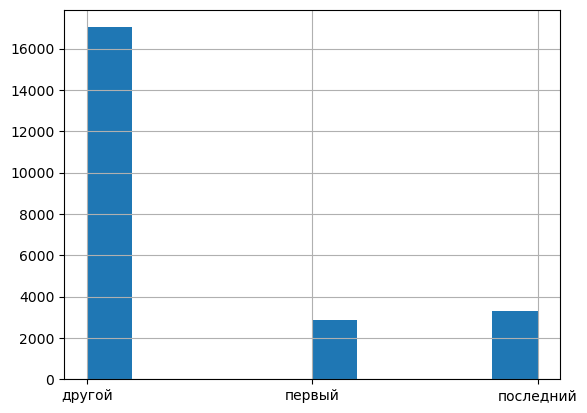

In [96]:
data['type_floor'].hist()

**Conclusion:** The largest number apartments has type floor is 'другой'. 

### city_centers_nearest

{'median': 13188.0, 'mean': 14341.862545085663, 'right_whisker': 26644.75, 'left_whisker': 181.0}


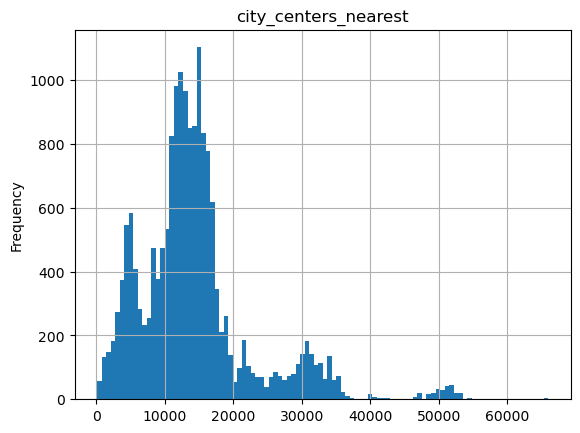

In [97]:
print_value_hist(data, 'city_centers_nearest')

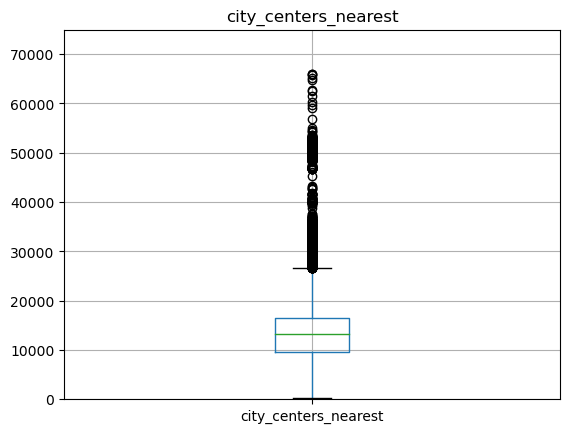

In [98]:
print_value_boxplot('city_centers_nearest', 75000)

**Conclusion:** The median is 13 km. Most apartments are located in residential areas, which are located in the middle between the center and the outskirs.

### airports_nearest

{'median': 26828.0, 'mean': 28864.85844053261, 'right_whisker': 65780.0, 'left_whisker': 0.0}


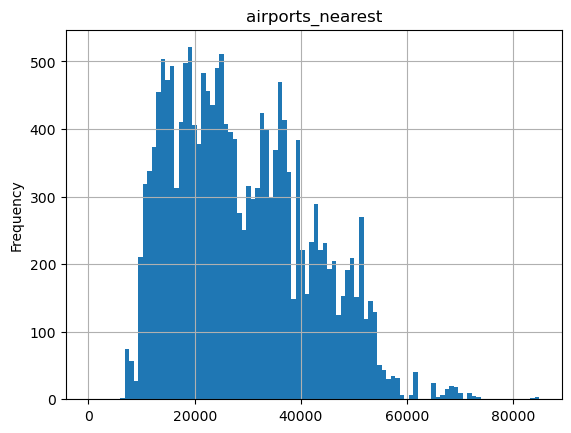

In [99]:
print_value_hist(data, 'airports_nearest')

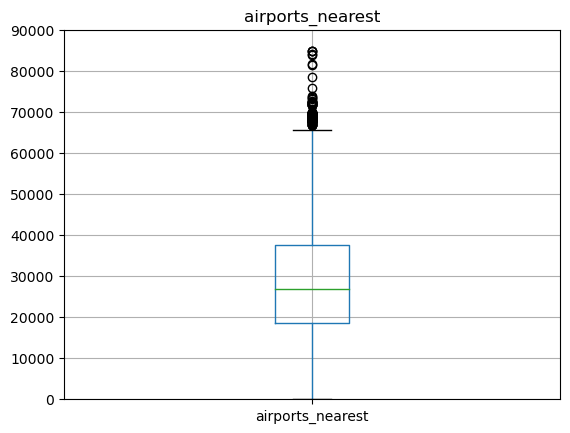

In [103]:
print_value_boxplot('airports_nearest', 90000)

**Conclusion:** Petersburg has one airport, which is located in the south of the city. Therefore the median is 26 km. It means that the assumption that the apartments are located between center and outskirs can be correct.

### parks_nearest

{'median': 456.0, 'mean': 493.2108895705521, 'right_whisker': 1099.0, 'left_whisker': 1.0}


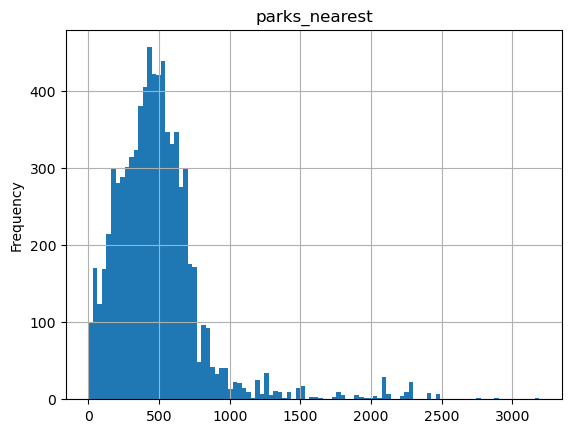

In [104]:
print_value_hist(data, 'parks_nearest')

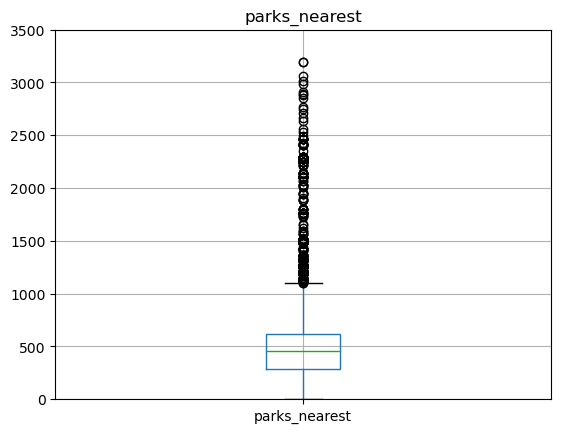

In [107]:
print_value_boxplot('parks_nearest', 3500)

**Conclusion:** The median is ~500 meters, and most apartments have nearest park, which is located less 1 km.

### day_of_post

{'median': 3.0, 'mean': 2.565071006172573, 'right_whisker': 8.5, 'left_whisker': 0}


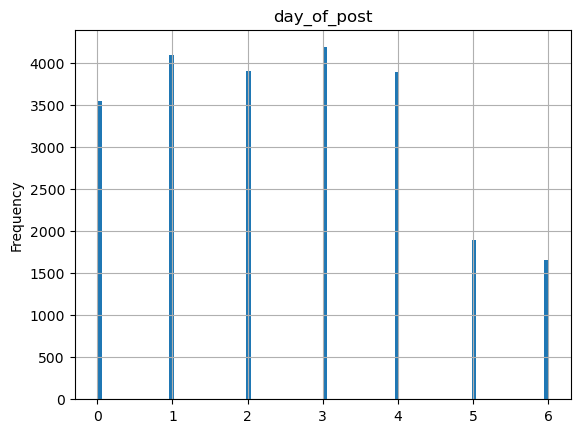

In [108]:
print_value_hist(data, 'day_of_post')

**Conclusion:** Users post ads most often on weekdays

### month_of_post

{'median': 6.0, 'mean': 6.393620235680062, 'right_whisker': 20.5, 'left_whisker': 1}


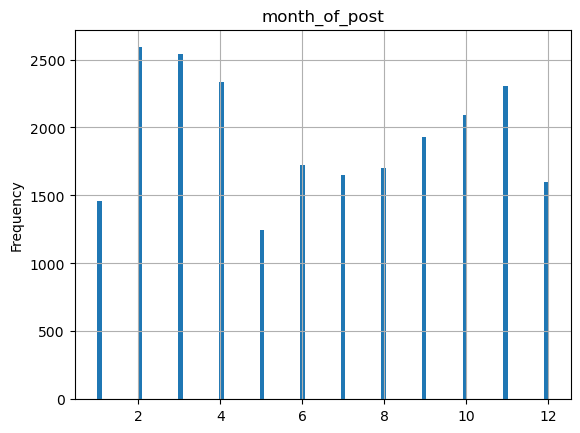

In [111]:
print_value_hist(data, 'month_of_post')

**Conclusion:** Users post ads most often on February, March, April and November

### days_exposition

{'median': 95.0, 'mean': 180.14737681231628, 'right_whisker': 507.5, 'left_whisker': 1.0}


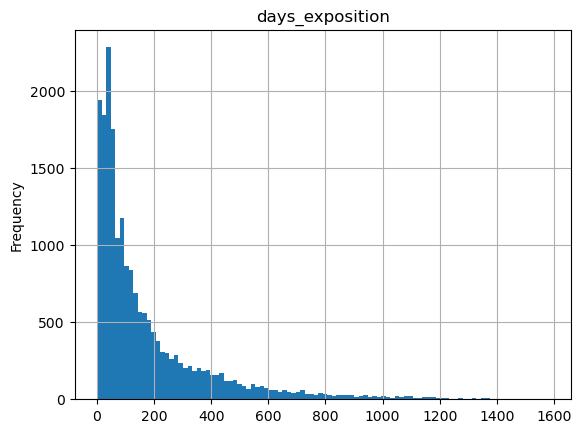

In [112]:
print_value_hist(data, 'days_exposition')

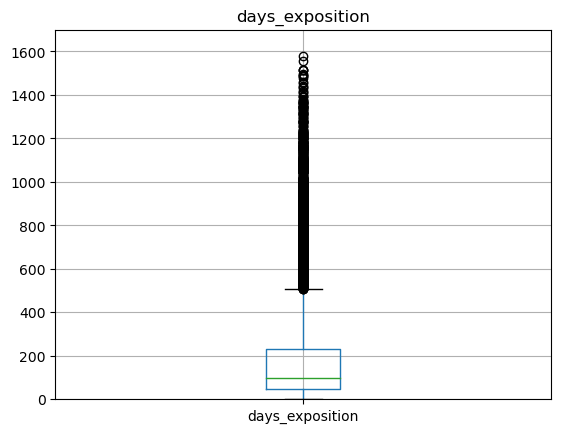

In [115]:
print_value_boxplot('days_exposition', 1700)

**Conclusion:** The median is 95 days. Most apartments are sold in less than 200 days

### Let's study the features that most affect the cost of an apartment

Function for displaying a correlation graph

In [122]:
def print_corr_graph(depend_column1, depend_column2):
    data.plot(x=depend_column2, y=depend_column1, kind='scatter', grid=True, alpha=0.3)
    print(data[depend_column2].corr(data[depend_column1]))

In [126]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_square_meter', 'day_of_post',
       'month_of_post', 'year_of_post', 'type_floor', 'city_center_km'],
      dtype='object')

**Relationship between last_price and total_area**

0.7905091227735189


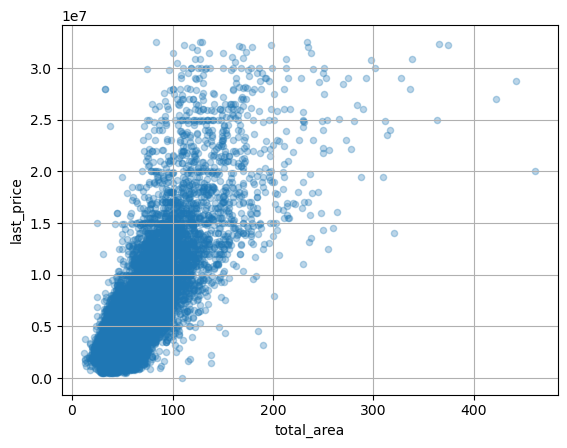

In [127]:
print_corr_graph('last_price', 'total_area')

**Conclusion:** The retalionship between last_price and total_area is direct

**Relationship between last_price and living_area**

0.6692480596392412


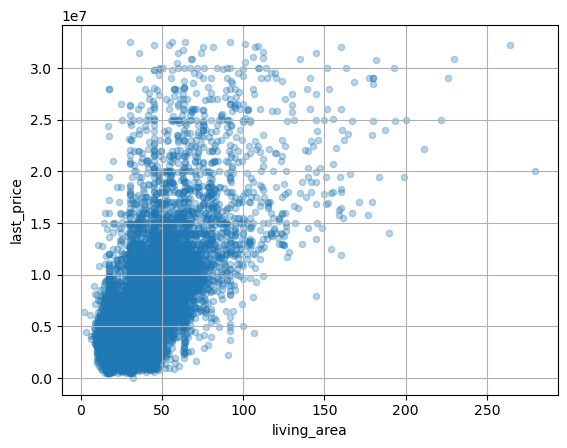

In [128]:
print_corr_graph('last_price', 'living_area')

**Conclusion:** The retalionship between last_price and living_area is direct, but relationship is less

**Relationship between last_price and kitchen_area**

0.5817706060505748


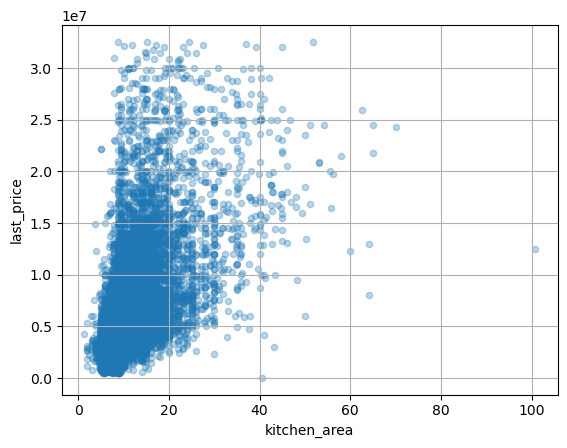

In [129]:
print_corr_graph('last_price', 'kitchen_area')

**Conclusion:** The retalionship between last_price and kitchen_area is weak

**Relationship between last_price and count rooms**

0.5240974481015545


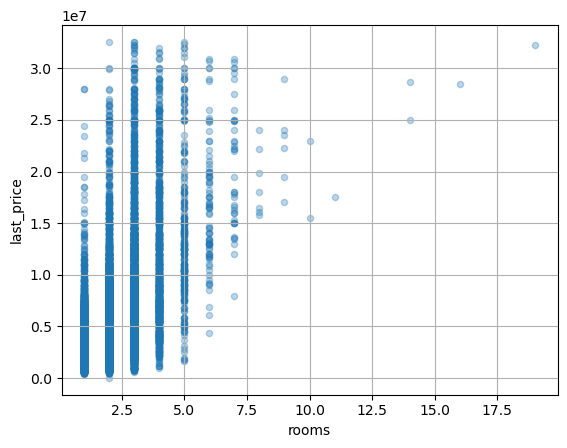

In [130]:
print_corr_graph('last_price', 'rooms')

**Conclusion:** The retalionship between last_price and rooms is weak

**Relationship between last_price and type_floor**

type_floor is not type numeric data type, than we will use different method

<AxesSubplot:xlabel='type_floor'>

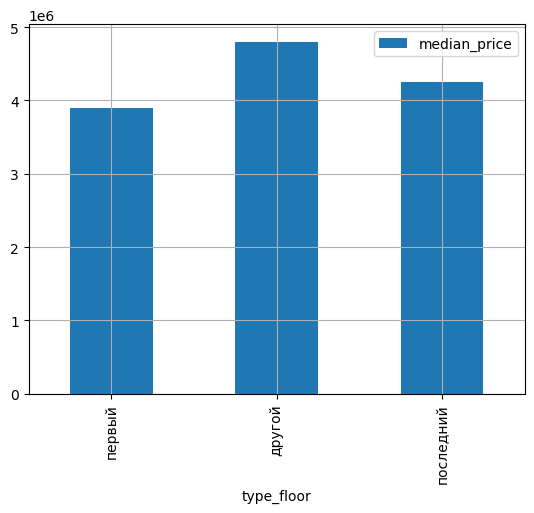

In [131]:
data_new = pd.DataFrame({
    'type_floor': ['первый', 'другой', 'последний'],
    'median_price': [
        data[data['type_floor'] == 'первый']['last_price'].median(), 
        data[data['type_floor'] == 'другой']['last_price'].median(), 
        data[data['type_floor'] == 'последний']['last_price'].median()
    ]
})
data_new.plot(x='type_floor', y='median_price', kind='bar', grid=True)

**Conclusion:** 'Other floor' is most big, 'First floor' is most small 

**Relationship between last_price day_of_post, month_of_post and year_of_post**

-0.021085269635421674


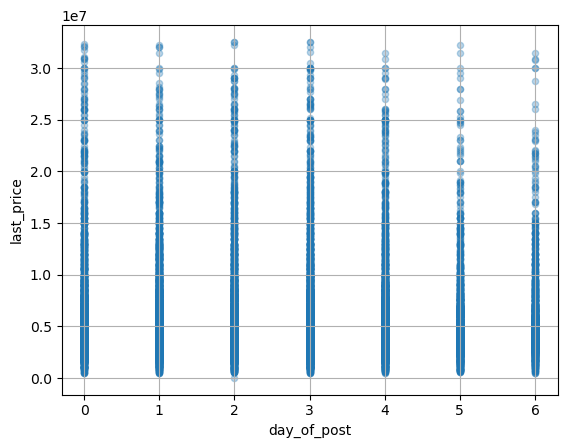

In [132]:
print_corr_graph('last_price', 'day_of_post')

0.0030975939336547595


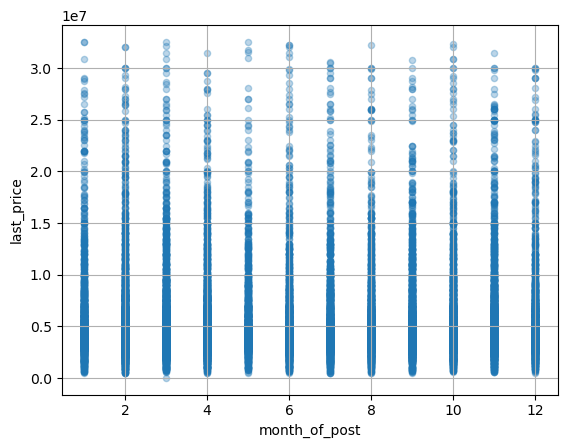

In [133]:
print_corr_graph('last_price', 'month_of_post')

-0.03918420100438905


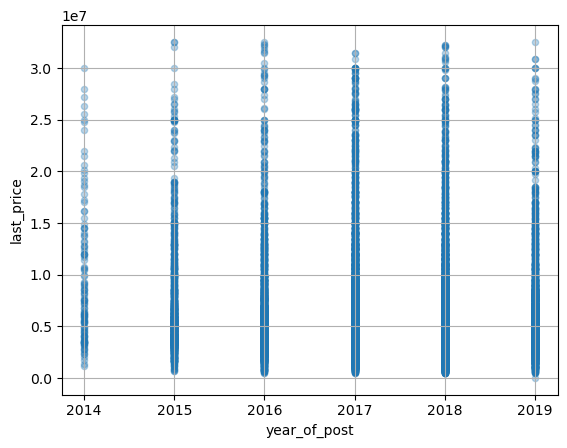

In [134]:
print_corr_graph('last_price', 'year_of_post')

**Conclusion:** There is no relationship between last_price and date

**The cost of 1 square meter in 10 settlements**

In [135]:
famous_town = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
famous_town

locality_name
Санкт-Петербург      15328
посёлок Мурино         495
посёлок Шушары         436
Всеволожск             392
Пушкин                 367
Колпино                337
посёлок Парголово      323
Гатчина                307
деревня Кудрово        283
Выборг                 237
Name: locality_name, dtype: int64

In [136]:
dict_town = {}
for item in range(len(famous_town)):
    dict_town[famous_town.index[item]] = data[data['locality_name'] == famous_town.index[item]]['price_square_meter'].mean()
    
dict_town

{'Санкт-Петербург': 110633.52952043015,
 'посёлок Мурино': 85031.77647906615,
 'посёлок Шушары': 78405.73842022821,
 'Всеволожск': 68618.01371219158,
 'Пушкин': 103130.85174353636,
 'Колпино': 75333.29580052705,
 'посёлок Парголово': 90289.77839268892,
 'Гатчина': 68746.14676333923,
 'деревня Кудрово': 92297.21884705474,
 'Выборг': 58141.909153318615}

**Conclusion:** The highest cost of an apartments in St. Petersburg, the lowest in Vyborg

### Let's calculate the average price of each km

<Figure size 2000x1000 with 0 Axes>

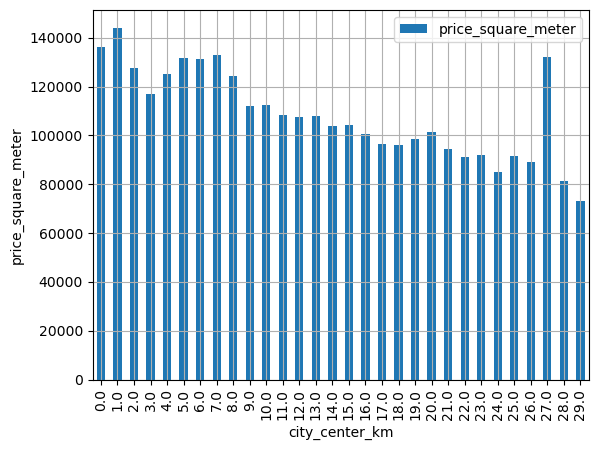

In [137]:
data_cost_meter = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index=['city_center_km'], values='price_square_meter', aggfunc='mean')

plt.figure(figsize=(20, 10))
data_cost_meter.plot(kind='bar')
plt.xlabel('city_center_km')
plt.ylabel('price_square_meter')
plt.grid(True)
plt.show()


-0.3790317839377861


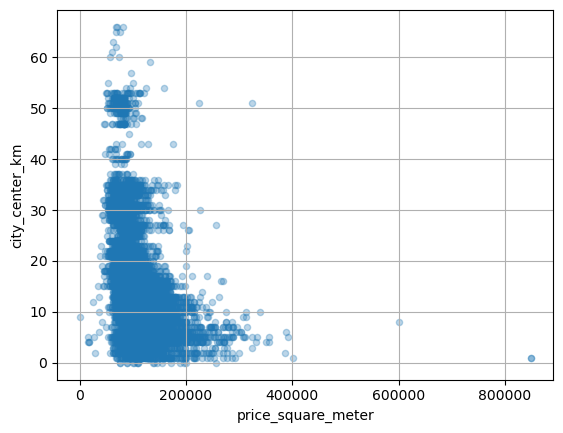

In [139]:
print_corr_graph('city_center_km', 'price_square_meter')

**Conclusion:** There is an inverse relationship between the data

## Final conclusion

The dataset has flaws. The main reason is many missing values in the data. \
There are many missing values in the map data due to incorrect data upload. \
**Recommendation:** Contact the backend-developers and find out what the problem might be. \
\
Also a lot of missing values due to the user's fault. Users do not fill in the data. \
**Recommendation:** Contact the frontend-developers and find out what the problem might be. \
\
To make the data more complete, let's need to add new features:
- year the house was built
- distance to nearest metro station